# What Contributes the Most to a Win in the Overwatch League?
## Author: Christian Smith

Among many notable changes that have been made in Overwatch 2 with its release in late 2022, players were pleased to finally have the highly anticipated in-game scoreboard, allowing each player to distinguish the worst performer on their team and blame them for their constant string of losses. However, it can often be difficult to determine who truly sold the match to the other team using just the total damage, healing provided, and damage mitigated displayed on the scoreboard alongside the player's K/A/D. Hence, I have sought for the best method that will allow me to blame my teammates with confidence. Using these newly provided statistics, I will investigate which of them are the most significant at determining which team is the most likely to win a map at the highest level of play, the Overwatch League.

## Importing Data

Before we begin, there are some important python libraries and two important datasets that will be used within the project. Both of these datasets are modifications of the official 2022 Overwatch League statistics provided by the Overwatch League on their website: [Official Overwatch League Statistics](https://overwatchleague.com/en-us/statslab). Details on how I modified these datasets will be available on the other attached file to this GitHub named: "Overwatch League Modified Datasets Details".

stats2022 Dataset:  
- <b>Match ID</b>: The identification number of the entire match  
- <b>Map</b>: The map name of the map being played (Note: there are typically 3-5 maps played in a full match, with 6-7 maps reserved for the finals of an event)  
- <b>Player</b>: The player name of whom accumulated the statistics
- <b>Team</b>: The team name the player played for during the map
- <b>Damage</b>: Total damage done by all heroes from the player
- <b>Healing</b>: Total healing done by all heroes from the player (Note: primarily applicable to supports)
- <b>Eliminations</b>: Total eliminations done by all heroes from the player
- <b>Deaths</b>: Total deaths encountered by all heroes from the player
- <b>Damage Blocked</b>: Total damage blocked by all heroes from the player (Note: usually only applicable to tanks)
- <b>Ultimates Used</b>: Total ultimates used by all heroes from the player
- <b>Average Time Building Ultimate</b>: Average length of time the player spent charging their ultimate between activations.
- <b>Role</b>: The role played by the player during the map (Note: 1 = tanks, 2 = dps, 3 = supports)
- <b>Winner</b>: Describes whether or not the player's team won the map played (Note: 1.0 = winner of map, 0.0 = loser of map)  
  
game_one Dataset:  
- <b>round_start_time</b>: Official time at which the map was started
- <b>round_end_time</b>: Official time at which the map was completed
- <b>stage</b>: Name of the tournament/event being played
- <b>match_id</b>: The identification number of the entire match
- <b>game_number</b>: The number of the map in a match (Note: Only the first map is being analyzed in this dataset, so the game_number value is always = 1)
- <b>match_winner</b>: The team name of the winner of the entire match
- <b>map_winner</b>: The team name of the winner of the map played
- <b>map_loser</b>: The team name of the loser of the map played
- <b>map_name</b>: The name of the map being played
- <b>first_victor</b>: Describes whether the team that won the first map in a match went on to win the entire match (1 = team went on to win the entire match, 0 = team went on to lose the entire match)

In [1]:
# Import required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rand
%matplotlib inline

# Used in the EDA and Modeling section
stats2022 = pd.read_csv('owl_stats_2022.csv')

# Used in the EDA section
game_one = pd.read_csv('game_one_2022.csv')

## Exploratory Data Analysis

### What are the Statistical Differences Between Winning and Losing Teams?

To begin the investigation, we will use the "stats2022" dataframe found in the "Importing Data" section to observe any trends within the statistical differences between winning and losing teams. This data set is a modification of the data provided directly by the Overwatch League with details on how it was created in the attached file named, "Overwatch League Modified Datasets Details".  
This data set contains well known statistics for every player during the 2022 Overwatch League season, including damage dealt, healing supplied, eliminations, deaths, damage blocked, ultimates used, the average time spent building the ultimate, and the average time alive for each player as well as whether or not the player won the MAP (not full match) for which the statistics apply to.
Finally, there is a "Role" column which describes the role of the player in the match for which the stats apply to. This will be used in the "Creating a New Statistic to Analyze Map Winners" section.

In [2]:
stats2022.head()

,Match ID,Map,Player,Team,Damage,Healing,Eliminations,Deaths,Damage Blocked,Ultimates Used,Average Time Building Ultimate,Average Time Alive,Role,Winner
0,38971,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,11560.871071,10333.540760,20.0,6.0,0.000000,4.0,731.976021,83.394003,3,1.0
1,38971,Lijiang Tower,Patiphan,Los Angeles Gladiators,12987.519505,0.000000,27.0,12.0,0.000000,4.0,695.848020,39.655501,2,1.0
2,38971,Lijiang Tower,Myunb0ng,New York Excelsior,5809.344608,13481.569533,18.0,12.0,0.000000,6.0,698.306020,45.837735,3,0.0
3,38971,Lijiang Tower,Yaki,New York Excelsior,16779.776752,61.864814,28.0,12.0,567.380009,5.0,764.867022,57.447002,2,0.0
4,38971,Lijiang Tower,Reiner,Los Angeles Gladiators,12185.249345,0.000000,24.0,9.0,19006.432701,4.0,637.724018,43.295229,1,1.0


#### Observing Statistical Differences

We will start by observing the statistical differences between the winning and losing teams in order to see if any significant variations are easily distinguishable between the two outcomes.

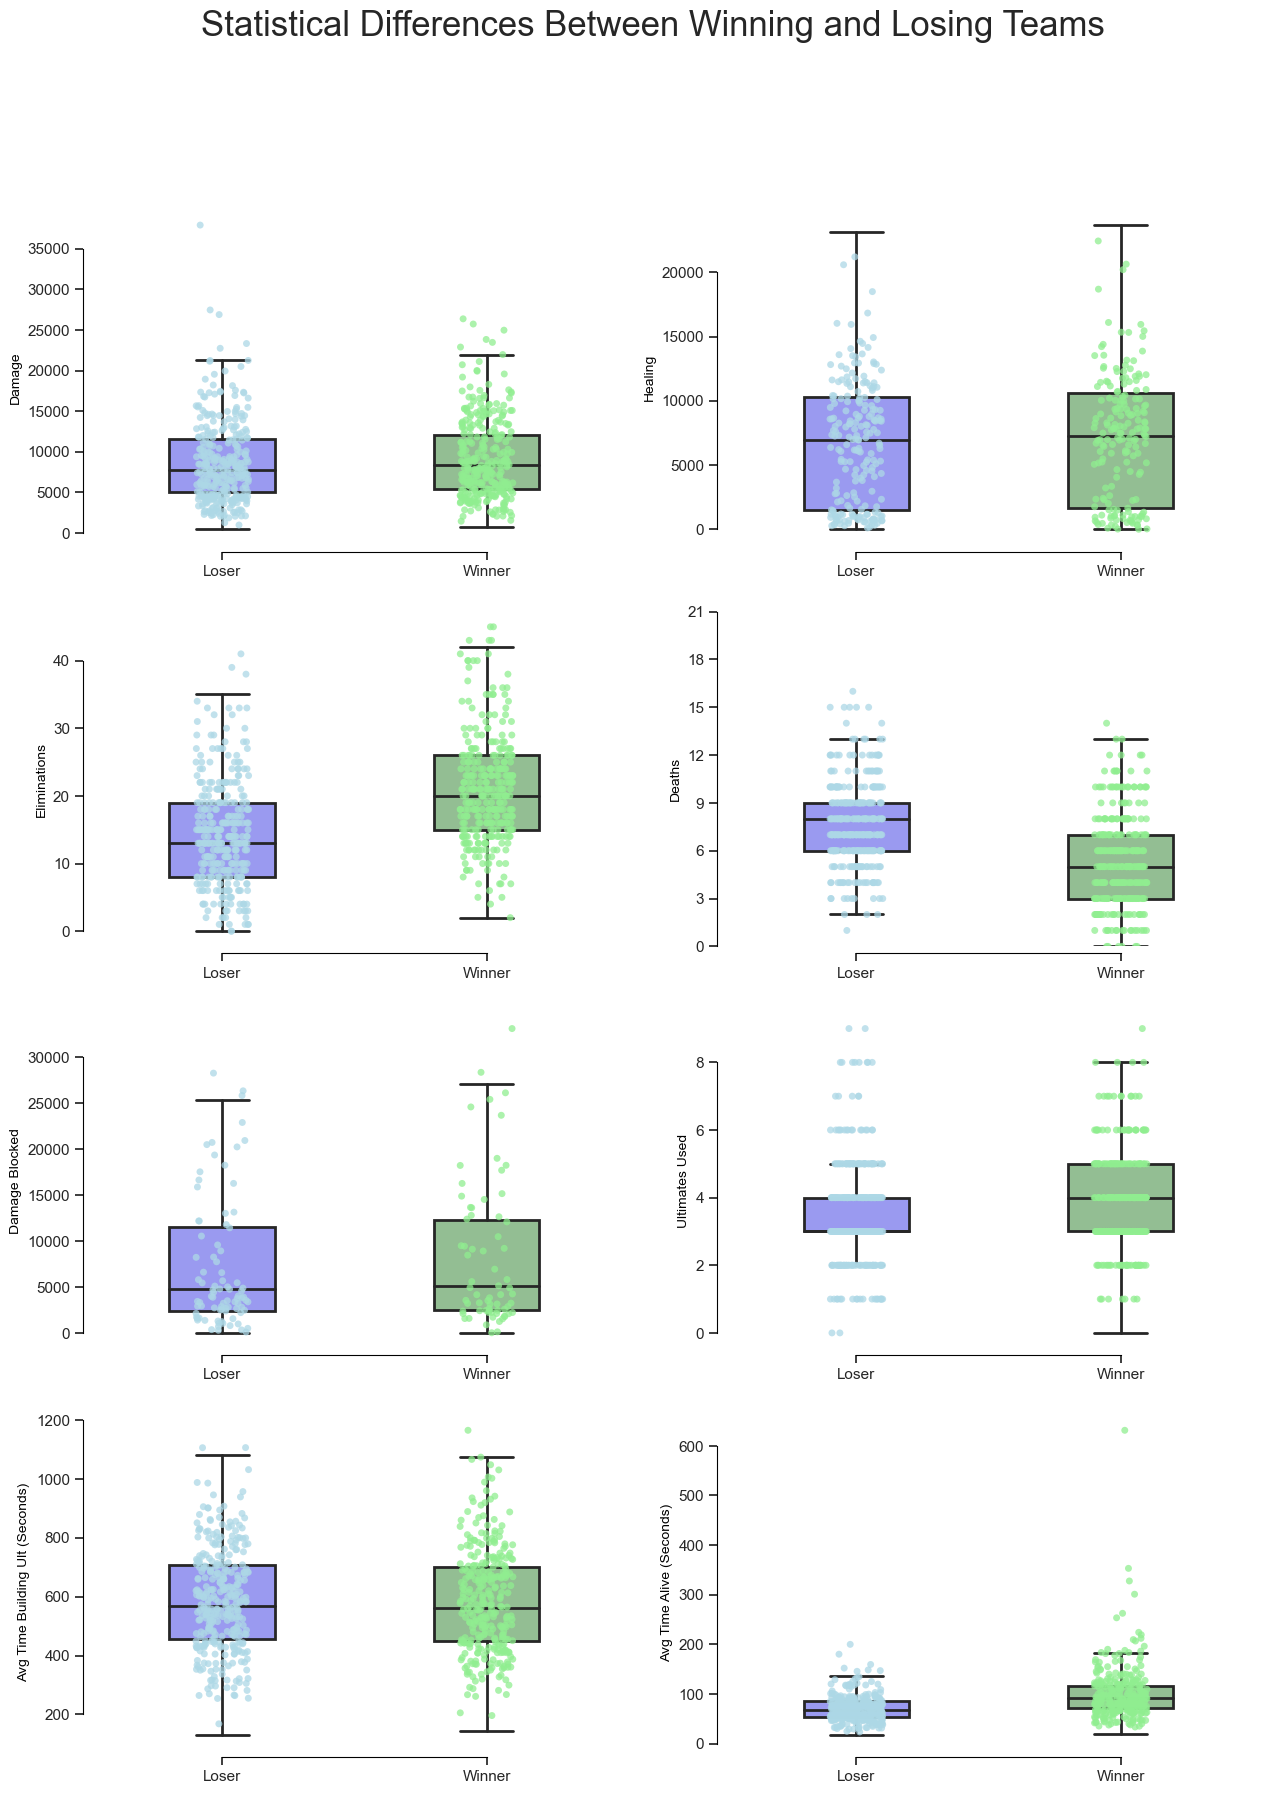

In [3]:
# First, we will use boxplots to visualize the stats of the map based on whether a team won or not (1.0 = win, 0.0 = lost)
# Note: The dots represent 5% of the data points within each box plot to display their true distribution
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize = (15, 20))
sns.set(style="ticks",
        rc={"figure.figsize": (6, 9),
            "figure.facecolor": "whitesmoke",
            "axes.facecolor": "whitesmoke"})
points_df = points_df = stats2022.sample(n = round(0.05*len(stats2022)))

sns.boxplot(x = 'Winner', y = 'Damage', data = stats2022, ax = ax1,
            width = 0.4,
            palette = {0.:'blue', 1.:'green'},
            linewidth = 2,
            showfliers = False)
sns.stripplot(x = 'Winner', y = 'Damage', data = points_df, ax = ax1,
              palette = ['lightblue', 'lightgreen'],
              linewidth = 0,
              alpha = 0.75)
for patch in ax1.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .45))
ax1.set_xticklabels(['Loser', 'Winner'])
ax1.set_xlabel(None)

sns.boxplot(x = 'Winner', y = 'Healing', data = stats2022[stats2022['Healing'] > 0], ax = ax2,
            width = 0.4,
            palette = {0.:'blue', 1.:'green'},
            linewidth = 2,
            showfliers = False)
sns.stripplot(x = 'Winner', y = 'Healing', data = points_df[points_df['Healing'] > 0], ax = ax2,
              palette = ['lightblue', 'lightgreen'],
              linewidth = 0,
              alpha = 0.75)
for patch in ax2.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .45))
ax2.set_xticklabels(['Loser', 'Winner'])
ax2.set_xlabel(None)

sns.boxplot(x = 'Winner', y = 'Eliminations', data = stats2022, ax = ax3,
            width = 0.4,
            palette = {0.:'blue', 1.:'green'},
            linewidth = 2,
            showfliers = False)
sns.stripplot(x = 'Winner', y = 'Eliminations', data = points_df, ax = ax3,
              palette = ['lightblue', 'lightgreen'],
              linewidth = 0,
              alpha = 0.75)
for patch in ax3.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .45))
ax3.set_xticklabels(['Loser', 'Winner'])
ax3.set_xlabel(None)

sns.boxplot(x = 'Winner', y = 'Deaths', data = stats2022, ax = ax4,
            width = 0.4,
            palette = {0.:'blue', 1.:'green'},
            linewidth = 2,
            showfliers = False)
sns.stripplot(x = 'Winner', y = 'Deaths', data = points_df, ax = ax4,
              palette = ['lightblue', 'lightgreen'],
              linewidth = 0,
              alpha = 0.75)
for patch in ax4.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .45))
ax4.set_xticklabels(['Loser', 'Winner'])
import matplotlib.ticker as ticker
for axis in [ax4.xaxis, ax4.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))
ax4.set_ylim(0, 21)
ax4.locator_params(axis='y', nbins=7)
ax4.set_xlabel(None)

sns.boxplot(x = 'Winner', y = 'Damage Blocked', data = stats2022[stats2022['Damage Blocked'] > 0], ax = ax5,
            width = 0.4,
            palette = {0.:'blue', 1.:'green'},
            linewidth = 2,
            showfliers = False)
sns.stripplot(x = 'Winner', y = 'Damage Blocked', data = points_df[points_df['Damage Blocked'] > 0], ax = ax5,
              palette = ['lightblue', 'lightgreen'],
              linewidth = 0,
              alpha = 0.75)
for patch in ax5.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .45))
ax5.set_xticklabels(['Loser', 'Winner'])
ax5.set_xlabel(None)

sns.boxplot(x = 'Winner', y = 'Ultimates Used', data = stats2022, ax = ax6,
            width = 0.4,
            palette = {0.:'blue', 1.:'green'},
            linewidth = 2,
            showfliers = False)
sns.stripplot(x = 'Winner', y = 'Ultimates Used', data = points_df, ax = ax6,
              palette = ['lightblue', 'lightgreen'],
              linewidth = 0,
              alpha = 0.75)
for patch in ax6.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .45))
ax6.set_xticklabels(['Loser', 'Winner'])
ax6.set_xlabel(None)

sns.boxplot(x = 'Winner', y = 'Average Time Building Ultimate', data = stats2022, ax = ax7,
            width = 0.4,
            palette = {0.:'blue', 1.:'green'},
            linewidth = 2,
            showfliers = False)
sns.stripplot(x = 'Winner', y = 'Average Time Building Ultimate', data = points_df, ax = ax7,
              palette = ['lightblue', 'lightgreen'],
              linewidth = 0,
              alpha = 0.75)
for patch in ax7.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .45))
ax7.set_xticklabels(['Loser', 'Winner'])
ax7.set_ylabel('Avg Time Building Ult (Seconds)')
ax7.set_xlabel(None)

sns.boxplot(x = 'Winner', y = 'Average Time Alive', data = stats2022, ax = ax8,
            width = 0.4,
            palette = {0.:'blue', 1.:'green'},
            linewidth = 2,
            showfliers = False)
sns.stripplot(x = 'Winner', y = 'Average Time Alive', data = points_df, ax = ax8,
              palette = ['lightblue', 'lightgreen'],
              linewidth = 0,
              alpha = 0.75)
for patch in ax8.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .45))
ax8.set_xticklabels(['Loser', 'Winner'])
ax8.set_ylabel('Avg Time Alive (Seconds)')
ax8.set_xlabel(None)

fig.suptitle('Statistical Differences Between Winning and Losing Teams', fontsize=25)
sns.despine(offset = 5, trim = True)
plt.show()

From the boxplots, we can observe three plots where there are big differences in the metrics between the winning and losing team:  eliminations, deaths, and average time staying alive. These stats seem to suggest that the most important factor in winning a match is "playing one's life" and that getting opening picks to begin teamfights, also known as early eliminations, are the best determinants of which team will emerge victorious. This idea is supported by looking at the relative unimportance of the other statistics that are being tracked. Damage and healing, for example, are incredibly similar regardless of the outcome of the map, demonstrating that pumping damage into the enemy team while allowing them to get healed by their supports is not incredibly useful. Securing the eliminations and reducing the more vital average time alive of the opposing players, on the other hand, will help ensure that the winning team always has an advantage in teamfights which will more significantly contribute to map victories. Overwatch is fundamentally a team-oriented game and convincing teamfight successes are necessary to push the objective or prevent its motion towards the end goal.  Being down a player in Overwatch makes it substantially harder to win those pivotal teamfights due to the vital importance each role plays in a one tank, two dps, two support system which more conclusively decide the outcomes of maps. 

### Creating a New Statistic to Analyze Map Winners

While it is important to analyze which statistics on a team-level best contribute towards a win, would it be possible to scale down and numerically determine how much each individual player contributes to their team's success? If possible, we could evaluate which players are the best in the Overwatch League as a player’s value on a team is intrinsically tied to their ability to aid their team in achieving triumph. For this endeavor, we can look to other sports as a form of inspiration, such as basketball and its "Box Plus Minus" statistic or baseball with its "wOBA" stat calculations. In order to translate a weighted statistic that helps analyze individual player performance from the real world into Overwatch, we will weigh the most important factors for winning a map (mainly eliminations, deaths, and average time spent alive among the other factors) and apply it to every player. The statistic will be a valid measure of individual performance if it can perform well in predicting map outcomes.

This new statistic will be called Overwatch Win Expectancy (oWE) and its sister companion, oWE+. oWE is a role-based, weighted statistic that returns a score based on the player’s stats within the game played. oWE+ modifies the oWE score where league-average performance is centered around zero with a standard deviation of one for each role. When analyzing oWE+, we can determine whether each tank, dps, or support player had a substantial contribution (oWE+ is positive), a non-influential contribution (oWE+ is zero), or a harmful contribution (oWE+ is negative) towards their team’s map victory. In other words, a high oWE+ describes an impactful performance, while a low oWE+ characterizes a rather lackluster one. To create oWE, we will set up the following:

In [4]:
# First, we will start by adding the oWE stat for each player to the stats2022 data set.
def calculate_z(df):
    # Parameters: df (a dataframe)
    # Purpose: to collect the mean and standard deviations of necessary columns (i.e. "Damage" stats from the stats2022 df)
    dmg = []
    heals = []
    ults = []
    talive = []
    # This first loop calculates the mean values for each stat based on role
    for i in range(1, 4):
        dmg.append(np.mean(df[df['Role'] == i]['Damage']))
        heals.append(np.mean(df[df['Role'] == i]['Healing']))
        ults.append(np.mean(df[df['Role'] == i]['Ultimates Used']))
        talive.append(np.mean(df[df['Role'] == i]['Average Time Alive']))
    
    std_dmg = []
    std_heals = []
    std_ults = []
    std_talive = []
    # This second loop calculates the standard deviations for each stat based on role
    for v in range(1, 4):
        std_dmg.append(np.std(df[df['Role'] == v]['Damage']))
        std_heals.append(np.std(df[df['Role'] == v]['Healing']))
        std_ults.append(np.std(df[df['Role'] == v]['Ultimates Used']))
        std_talive.append(np.std(df[df['Role'] == v]['Average Time Alive']))
    
    return dmg, heals, ults, talive, std_dmg, std_heals, std_ults, std_talive

# Then we will set all of the values in a list to be used in our oWE calculation
dmg, heals, ults, talive, std_dmg, std_heals, std_ults, std_talive = calculate_z(stats2022)

# Next, we will define the oWE calculation
def oWE(df):
    # Parameters: df (a dataframe)
    # Purpose: to act as a function to apply the oWE column to the data frame
    oWE_num = 0
    
    # There is a unique algorithm based on role which was determined based on their role-based permutation importance gathered from the decision tree model shown in the "modeling" section
    algorithm_tank = (1.90 * df['Eliminations']) - (3.20 * df['Deaths']) + (1.40 * ((df['Damage'] - dmg[0]) / std_dmg[0])) + (1.05 * ((df['Ultimates Used'] - ults[0]) / std_ults[0])) + (1.90 * ((df['Average Time Alive'] - talive[0]) / std_talive[0]))
    
    algorithm_dps = (2.55 * df['Eliminations']) - (2.45 * df['Deaths']) + (1.90 * ((df['Damage'] - dmg[1]) / std_dmg[1])) + (1.25 * ((df['Ultimates Used'] - ults[1]) / std_ults[1])) + (0.50 * ((df['Average Time Alive'] - talive[0]) / std_talive[0]))
    
    algorithm_support = (1.75 * df['Eliminations']) - (3.50 * df['Deaths']) + (1.75 * ((df['Damage'] - dmg[2]) / std_dmg[2])) + (2.00 * ((df['Ultimates Used'] - ults[2]) / std_ults[2]))  + (1.70 * ((df['Healing'] - heals[2]) / std_heals[2]))
    
    if (df['Role'] == 1):
        oWE_num = algorithm_tank
    elif (df['Role'] == 2):
        oWE_num = algorithm_dps
    else:
        oWE_num = algorithm_support
    return oWE_num

# Finally, we will add the column to our existing stats2022 dataframe
stats2022['oWE'] = stats2022.apply(oWE, axis = 1)

In [5]:
# We can verify that the column was added successfully
stats2022.head()

,Match ID,Map,Player,Team,Damage,Healing,Eliminations,Deaths,Damage Blocked,Ultimates Used,Average Time Building Ultimate,Average Time Alive,Role,Winner,oWE
0,38971,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,11560.871071,10333.540760,20.0,6.0,0.000000,4.0,731.976021,83.394003,3,1.0,18.738623
1,38971,Lijiang Tower,Patiphan,Los Angeles Gladiators,12987.519505,0.000000,27.0,12.0,0.000000,4.0,695.848020,39.655501,2,1.0,39.419352
2,38971,Lijiang Tower,Myunb0ng,New York Excelsior,5809.344608,13481.569533,18.0,12.0,0.000000,6.0,698.306020,45.837735,3,0.0,-5.429408
3,38971,Lijiang Tower,Yaki,New York Excelsior,16779.776752,61.864814,28.0,12.0,567.380009,5.0,764.867022,57.447002,2,0.0,44.315493
4,38971,Lijiang Tower,Reiner,Los Angeles Gladiators,12185.249345,0.000000,24.0,9.0,19006.432701,4.0,637.724018,43.295229,1,1.0,15.476048


In order to add the oWE+ column, we will follow a similar format:

In [6]:
def cal_z(df):
    # Parameters: df (a dataframe)
    # Purpose: to collect the mean and standard deviation of the oWE column
    owe = []
    for w in range(1, 4):
        owe.append(np.mean(df[df['Role'] == w]['oWE']))
            
    std_owe = []
    for y in range(1, 4):
        std_owe.append(np.std(df[df['Role'] == y]['oWE']))
    return owe, std_owe

#Then we will set all of the values in a list to be used in our oWE+ calculation
owe, std_owe = cal_z(stats2022)

def oWE_plus(df):
    # Parameters: df (a dataframe)
    # Purpose: to act as a function to apply the oWE+ column to the dataframe
    owe_plus_num = 0
    if (df['Role'] == 1):
        oWE_plus_num = (df['oWE'] - owe[0]) / std_owe[0]
    elif (df['Role'] == 2):
        oWE_plus_num = (df['oWE'] - owe[1]) / std_owe[1]
    else:
        oWE_plus_num = (df['oWE'] - owe[2]) / std_owe[2]
    return oWE_plus_num

# Finally, we will add the column to our existing stats2022 dataframe
stats2022['oWE+'] = stats2022.apply(oWE_plus, axis = 1)

In [7]:
# We can verify that the column was added successfully
stats2022.head()

,Match ID,Map,Player,Team,Damage,Healing,Eliminations,Deaths,Damage Blocked,Ultimates Used,Average Time Building Ultimate,Average Time Alive,Role,Winner,oWE,oWE+
0,38971,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,11560.871071,10333.540760,20.0,6.0,0.000000,4.0,731.976021,83.394003,3,1.0,18.738623,1.021284
1,38971,Lijiang Tower,Patiphan,Los Angeles Gladiators,12987.519505,0.000000,27.0,12.0,0.000000,4.0,695.848020,39.655501,2,1.0,39.419352,0.171326
2,38971,Lijiang Tower,Myunb0ng,New York Excelsior,5809.344608,13481.569533,18.0,12.0,0.000000,6.0,698.306020,45.837735,3,0.0,-5.429408,-0.432064
3,38971,Lijiang Tower,Yaki,New York Excelsior,16779.776752,61.864814,28.0,12.0,567.380009,5.0,764.867022,57.447002,2,0.0,44.315493,0.373869
4,38971,Lijiang Tower,Reiner,Los Angeles Gladiators,12185.249345,0.000000,24.0,9.0,19006.432701,4.0,637.724018,43.295229,1,1.0,15.476048,-0.046168


With both oWE and oWE+ added to our dataframe, we can now check how these values vary across winning and losing teams using the same boxplot plot as above.

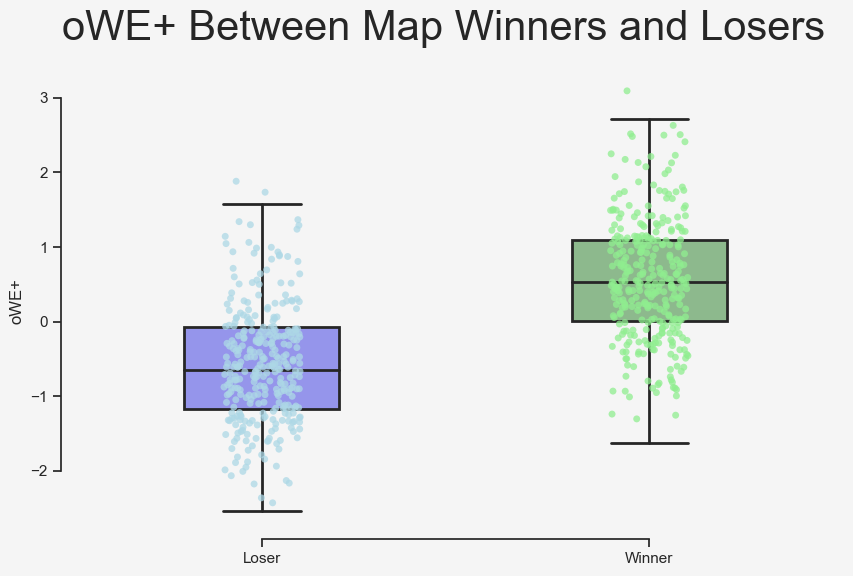

In [8]:
# Similar to the boxplots above, this graph will show the differences in the five number summary of oWE+ between the winning and losing team
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.set(style="ticks",
        rc={"figure.figsize": (6, 9),
            "figure.facecolor": "whitesmoke",
            "axes.facecolor": "whitesmoke"})

sns.boxplot(x = 'Winner', y = 'oWE+', data = stats2022, ax = ax,
            width = 0.4,        # The width of the boxes
            palette = {0.:'blue', 1.:'green'},  # Box colour
            linewidth = 2,      # Thickness of the box lines
            showfliers = False)
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .45))

points_df = points_df = stats2022.sample(n = round(0.05*len(stats2022)))
sns.stripplot(x = 'Winner', y = 'oWE+', data = points_df, ax = ax,
              palette = ['lightblue', 'lightgreen'], # Colours the dots
              linewidth = 0,     # Dot outline width
              alpha = 0.75)

ax.set_xticklabels(['Loser', 'Winner'])
ax.set_xlabel(None)
sns.despine(offset = 5, trim = True)
fig.suptitle('oWE+ Between Map Winners and Losers', fontsize=30)
plt.show()

The winning team has a median oWE+ approximately one standard deviation higher than that of the losing team. This makes sense as oWE+ is simply an aggregate statistic of the most important factors of winning a map as found earlier.
As described earlier, the main objective of oWE+ is to measure individual performance, and that is certainly possible using this new statistic. To extend the possibilities of this statistic, we can use it to show the most consistent, contributing, and effective players by analyzing average oWE+ across all their maps played, and we can find the best individual performances by looking at the highest oWE+ in a map by a player.  
To visualize oWE+, we will create the following:

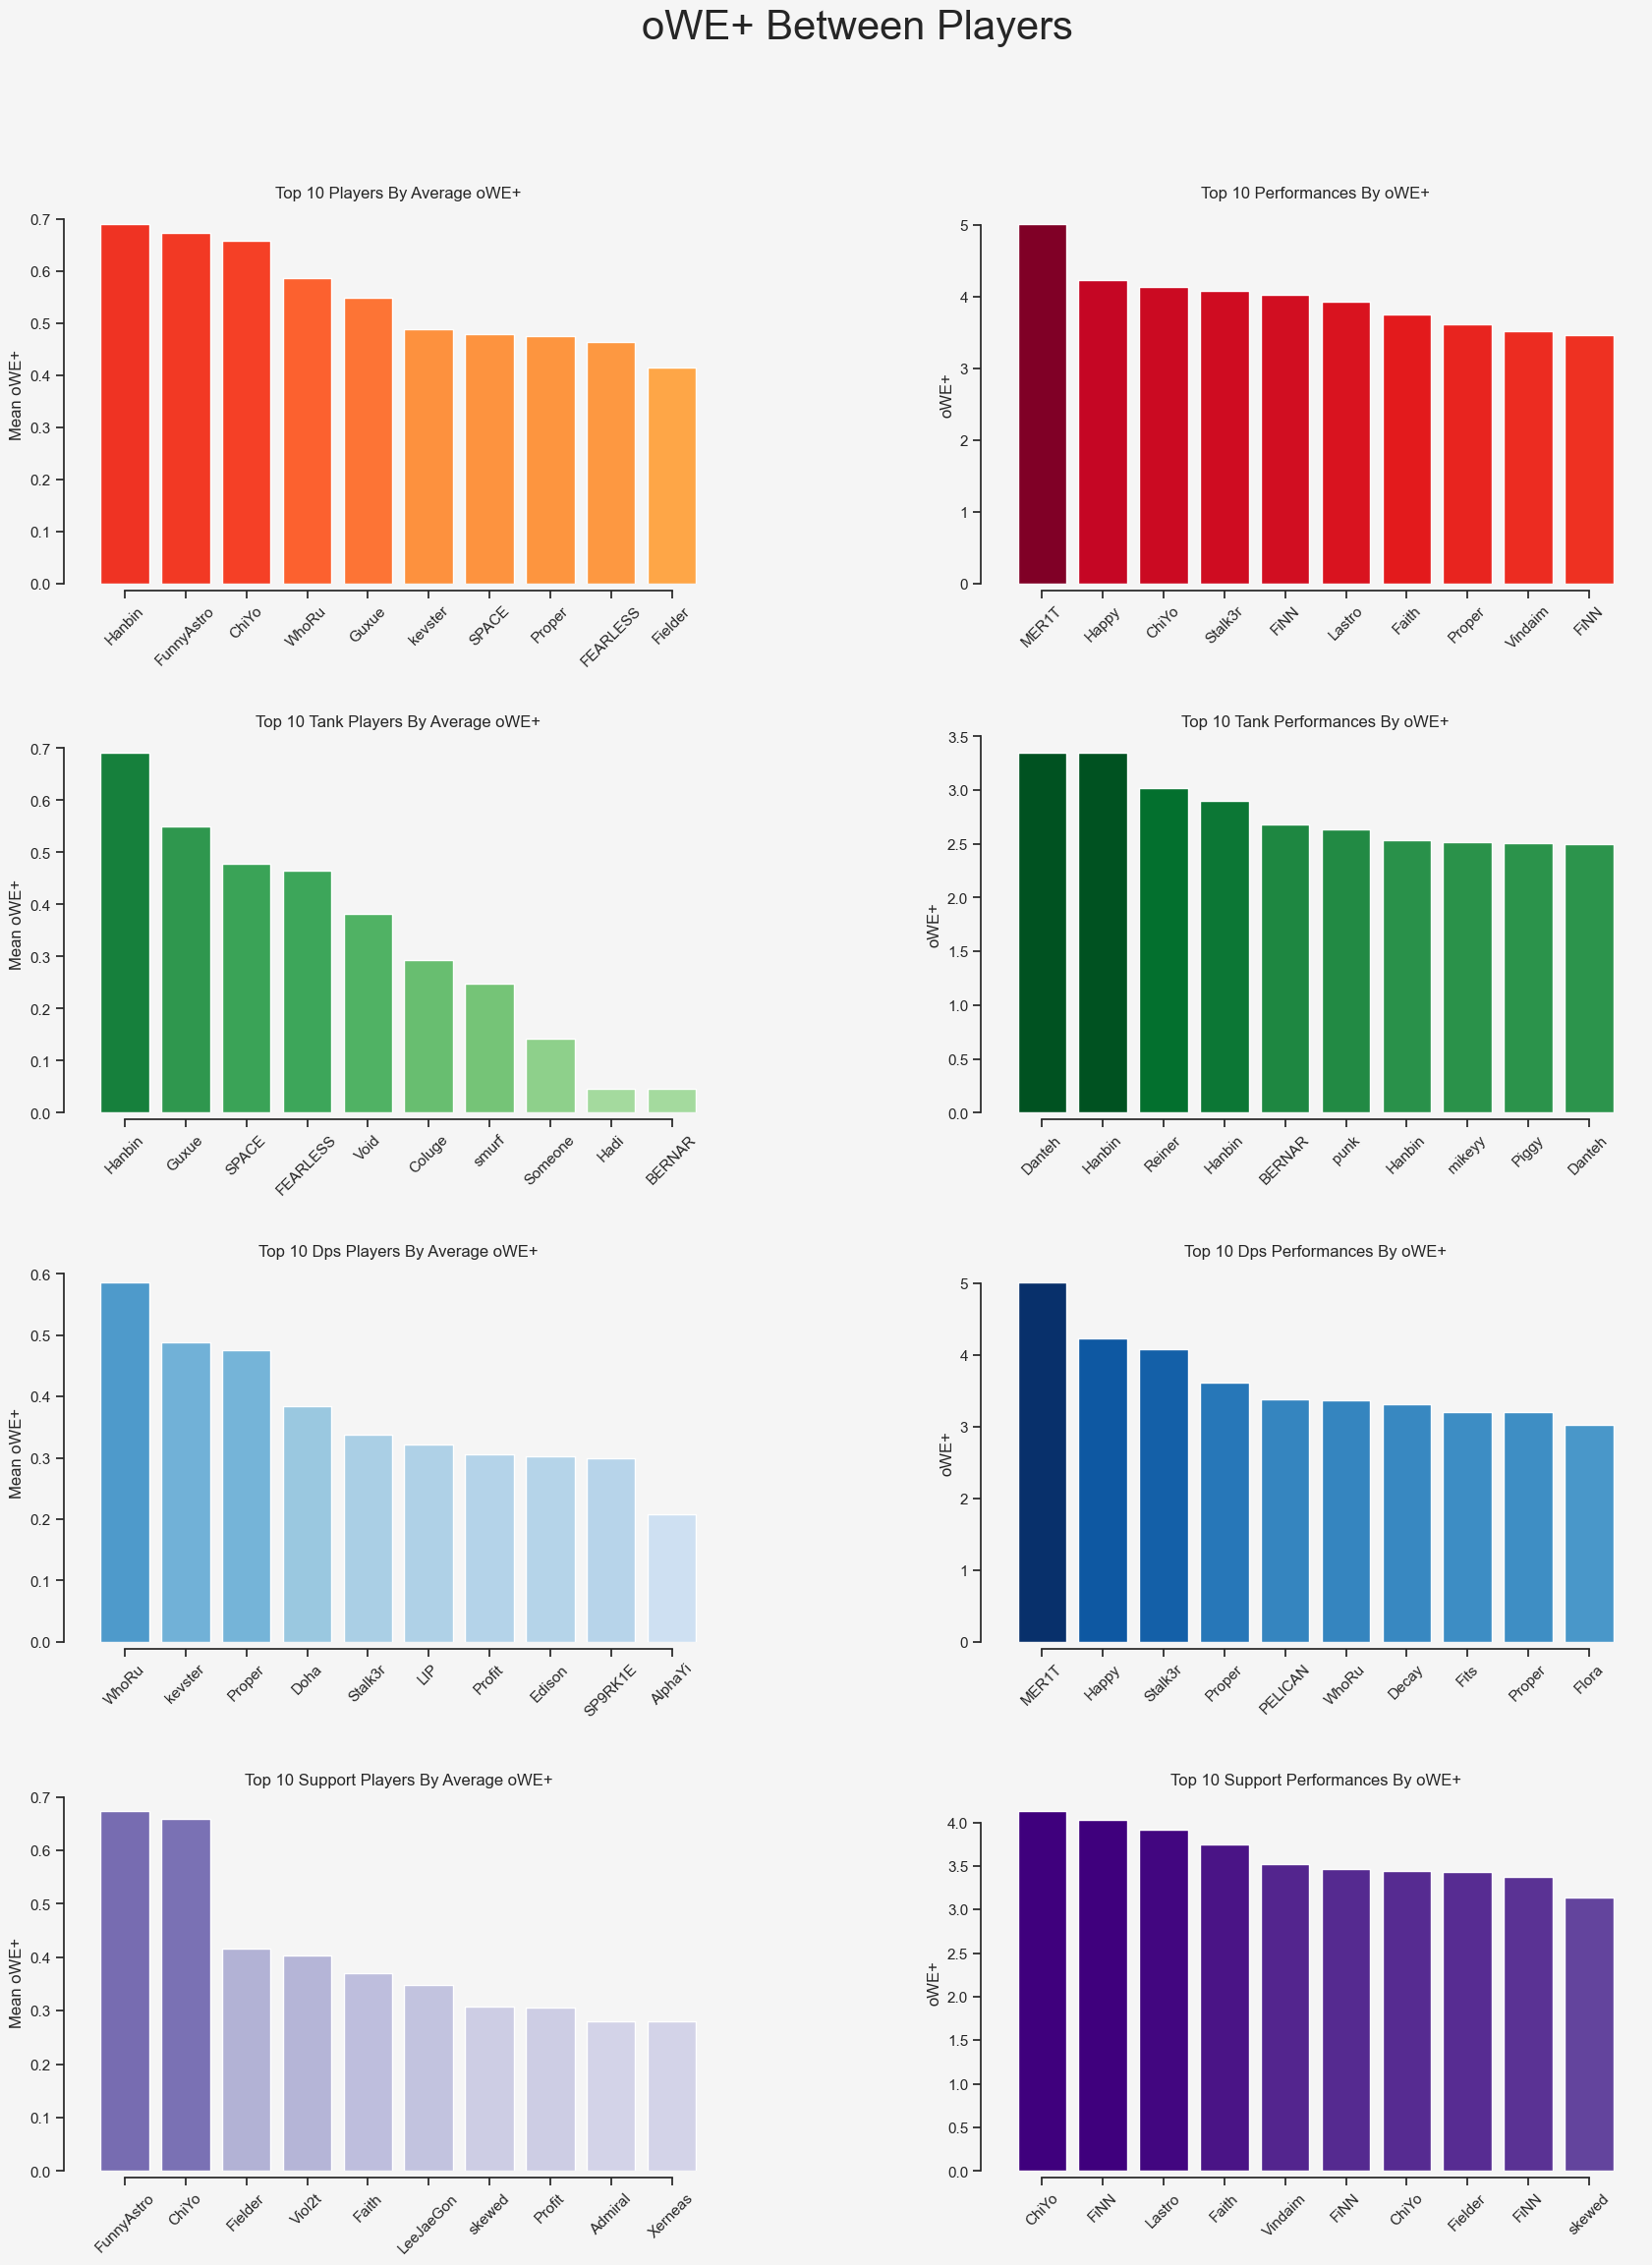

In [47]:
# First, we will create a dataframe that sorts all of the players by their oWE+ scores
stats2022_maxoWEP = stats2022.sort_values('oWE+', ascending = False)
# Next, we will create a dictionary of the sorted top players regardless of role for labeling the graph
player_name = []
win_ex_plus = []
for player in stats2022['Player'].unique():
    player_name.append(player)
    win_ex_plus.append(np.mean(stats2022[stats2022['Player'] == player]['oWE+']))
best_dict = dict(zip(player_name, win_ex_plus))
sorted_dict = dict(sorted(best_dict.items(), reverse = True, key=lambda x:x[1]))

# Next, we will create a dictionary of the sorted top players within the three roles for labeling subsequent graphs
tank_name = []
dps_name = []
support_name = []
tank_win_ex_plus = []
dps_win_ex_plus = []
support_win_ex_plus = []
for num in range(1, 4):
    for player in stats2022[stats2022['Role'] == num]['Player'].unique():
        if (num == 1):
            tank_name.append(player)
            tank_win_ex_plus.append(np.mean(stats2022[stats2022['Player'] == player]['oWE+']))
        elif (num == 2):
            dps_name.append(player)
            dps_win_ex_plus.append(np.mean(stats2022[stats2022['Player'] == player]['oWE+']))
        elif (num == 3):
            support_name.append(player)
            support_win_ex_plus.append(np.mean(stats2022[stats2022['Player'] == player]['oWE+']))
tank_dict = dict(zip(tank_name, tank_win_ex_plus))
dps_dict = dict(zip(dps_name, dps_win_ex_plus))
support_dict = dict(zip(support_name, support_win_ex_plus))
tank_sorted_dict = dict(sorted(tank_dict.items(), reverse = True, key=lambda x:x[1]))
dps_sorted_dict = dict(sorted(dps_dict.items(), reverse = True, key=lambda x:x[1]))
support_sorted_dict = dict(sorted(support_dict.items(), reverse = True, key=lambda x:x[1]))

# Finally, we will graph the top average oWE+ regardless of role, then by role, and also the top performances both regardless of role and by role
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize = (20, 25))
sns.set(style="ticks",
        rc={"figure.figsize": (6, 9),
            "figure.facecolor": "whitesmoke",
            "axes.facecolor": "whitesmoke"})
import matplotlib.cm as cm
import matplotlib.colors as col

cmap1 = cm.ScalarMappable(col.Normalize(0, 1), 'YlOrRd')
ax1.bar(range(len(list(sorted_dict)[:10])), list(sorted_dict.values())[:10], tick_label = list(sorted_dict.keys())[:10],
       color = cmap1.to_rgba(list(sorted_dict.values())[:10]))
ax1.tick_params(axis = 'x', labelrotation=45)
ax1.set_title('Top 10 Players By Average oWE+')
ax1.set_ylabel('Mean oWE+')

cmap2 = cm.ScalarMappable(col.Normalize(0, 5), 'YlOrRd')
ax2.bar(range(len(stats2022_maxoWEP.head(10))), list(stats2022_maxoWEP['oWE+'].head(10)), 
        tick_label = list(stats2022_maxoWEP['Player'].head(10)),
        color = cmap2.to_rgba(list(stats2022_maxoWEP['oWE+'].head(10))))
ax2.tick_params(axis = 'x', labelrotation=45)
ax2.set_title('Top 10 Performances By oWE+')
ax2.set_ylabel('oWE+')

cmap3 = cm.ScalarMappable(col.Normalize(-0.5, 1), 'Greens')
ax3.bar(range(len(list(tank_sorted_dict)[:10])), list(tank_sorted_dict.values())[:10],
        tick_label = list(tank_sorted_dict.keys())[:10],
        color = cmap3.to_rgba(list(tank_sorted_dict.values())[:10]))
ax3.tick_params(axis = 'x', labelrotation=45)
ax3.set_title('Top 10 Tank Players By Average oWE+')
ax3.set_ylabel('Mean oWE+')

cmap4 = cm.ScalarMappable(col.Normalize(0, 3.5), 'Greens')
ax4.bar(range(len(stats2022_maxoWEP.head(10))), list(stats2022_maxoWEP[stats2022_maxoWEP['Role'] == 1]['oWE+'].head(10)), 
        tick_label = list(stats2022_maxoWEP[stats2022_maxoWEP['Role'] == 1]['Player'].head(10)),
        color = cmap4.to_rgba(list(stats2022_maxoWEP[stats2022_maxoWEP['Role'] == 1]['oWE+'].head(10))))
ax4.tick_params(axis = 'x', labelrotation=45)
ax4.set_title('Top 10 Tank Performances By oWE+')
ax4.set_ylabel('oWE+')

cmap5 = cm.ScalarMappable(col.Normalize(0, 1), 'Blues')
ax5.bar(range(len(list(dps_sorted_dict)[:10])), list(dps_sorted_dict.values())[:10],
        tick_label = list(dps_sorted_dict.keys())[:10],
        color = cmap5.to_rgba(list(dps_sorted_dict.values())[:10]))
ax5.tick_params(axis = 'x', labelrotation=45)
ax5.set_title('Top 10 Dps Players By Average oWE+')
ax5.set_ylabel('Mean oWE+')

cmap6 = cm.ScalarMappable(col.Normalize(0, 5), 'Blues')
ax6.bar(range(len(stats2022_maxoWEP.head(10))), list(stats2022_maxoWEP[stats2022_maxoWEP['Role'] == 2]['oWE+'].head(10)), 
        tick_label = list(stats2022_maxoWEP[stats2022_maxoWEP['Role'] == 2]['Player'].head(10)),
        color = cmap6.to_rgba(list(stats2022_maxoWEP[stats2022_maxoWEP['Role'] == 2]['oWE+'].head(10))))
ax6.tick_params(axis = 'x', labelrotation=45)
ax6.set_title('Top 10 Dps Performances By oWE+')
ax6.set_ylabel('oWE+')

cmap7 = cm.ScalarMappable(col.Normalize(0, 1), 'Purples')
ax7.bar(range(len(list(support_sorted_dict)[:10])), list(support_sorted_dict.values())[:10],
        tick_label = list(support_sorted_dict.keys())[:10],
        color = cmap7.to_rgba(list(support_sorted_dict.values())[:10]))
ax7.tick_params(axis = 'x', labelrotation=45)
ax7.set_title('Top 10 Support Players By Average oWE+')
ax7.set_ylabel('Mean oWE+')

cmap8 = cm.ScalarMappable(col.Normalize(0, 4), 'Purples')
ax8.bar(range(len(stats2022_maxoWEP.head(10))), list(stats2022_maxoWEP[stats2022_maxoWEP['Role'] == 3]['oWE+'].head(10)), 
        tick_label = list(stats2022_maxoWEP[stats2022_maxoWEP['Role'] == 3]['Player'].head(10)),
        color = cmap8.to_rgba(list(stats2022_maxoWEP[stats2022_maxoWEP['Role'] == 3]['oWE+'].head(10))))
ax8.tick_params(axis = 'x', labelrotation=45)
ax8.set_title('Top 10 Support Performances By oWE+')
ax8.set_ylabel('oWE+')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
sns.despine(offset = 5, trim = True)
fig.suptitle('oWE+ Between Players', fontsize=30)
plt.show()

By observing the graphs on the left, we can view the consistently most valuable players in the league to their team's success as sorted by the top ten in the season, and by the top ten within each role. Here, you will find the most prominent, vital contributors to their teams, easily among the best in the league, including 2022 Overwatch League MVP, Proper, and considered to be possibly the best support duo in the entire league, ChiYo and Fielder. On the right set of graphs are some of the best individual performances throughout the season and sorted within each role in terms of contributing to their teams success. Here, you will find an astounding 66 elimination outburst by Mer1t in just one game of circuit royale, or even a ridiculous 47 elimination performance by support player, ChiYo.

### A Brief Aside on Early Map Victories

Before diving into the modeling section where we attempt to predict winners of these maps using purely statistics from the map itself, it is important to discuss the importance of these map wins, particularly the early map wins. It is a common belief in most sports that in a series, the first game is always the most significant, whether it be in the NBA Playoffs or the Overwatch League. But, just how important is this first game in deciding a series? In this section, we will quickly look at why certain map victories can almost predict the outcome of a match on its own.

#### Winning the first map

When looking more broadly at entire matches, we can consider not only how teams play on individual maps, but how their success on these maps impacts the following maps across an entire match. We will first observe these trends by looking at the frist map winners as shown in the "game_one" data set, a modified data set for which the details of its creation will be included in the attached file, "Overwatch League Modified Datasets Details".

In [10]:
game_one.head()

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,first_victor
0,05/05/22 19:10,05/05/22 19:16,2022: Kickoff Clash: Qualifiers,38971,1,Los Angeles Gladiators,Los Angeles Gladiators,New York Excelsior,Lijiang Tower,1
1,05/05/22 21:01,05/05/22 21:05,2022: Kickoff Clash: Qualifiers,38972,1,San Francisco Shock,San Francisco Shock,Vegas Eternal,Ilios,1
2,05/05/22 22:23,05/05/22 22:28,2022: Kickoff Clash: Qualifiers,38973,1,Atlanta Reign,Florida Mayhem,Atlanta Reign,Lijiang Tower,0
3,05/06/22 19:06,05/06/22 19:10,2022: Kickoff Clash: Qualifiers,38975,1,San Francisco Shock,San Francisco Shock,London Spitfire,Lijiang Tower,1
4,05/06/22 20:25,05/06/22 20:31,2022: Kickoff Clash: Qualifiers,38974,1,Boston Uprising,Boston Uprising,Vancouver Titans,Ilios,1


We can visualize how often the first map winner wins the entire match by creating a countplot of the number of times a match winner won the first map

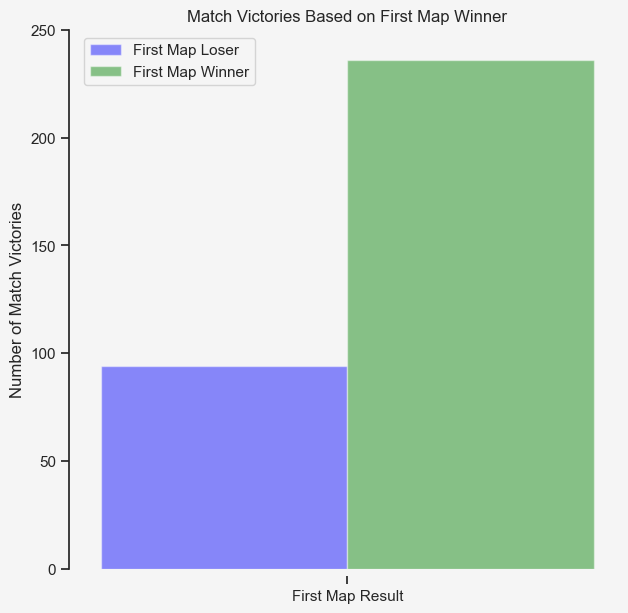

In [48]:
# This visualization will show how often the team that wins the first map goes on to win the entire match
fig = plt.figure(figsize = (7, 7))
sns.set(style="ticks",
        rc={"figure.figsize": (6, 9),
            "figure.facecolor": "whitesmoke",
            "axes.facecolor": "whitesmoke"})
winner_num = game_one[game_one['first_victor'] == 1.0]['first_victor'].value_counts()[1]
loser_num = game_one[game_one['first_victor'] == 0.0]['first_victor'].value_counts()[0]

X = ['First Map Result']
Ylosers = [loser_num]
Zwinners = [winner_num]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ylosers, 0.4, label = 'First Map Loser', color = 'blue', alpha = 0.45)
plt.bar(X_axis + 0.2, Zwinners, 0.4, label = 'First Map Winner', color = 'green', alpha = 0.45)
  
plt.xticks(X_axis, X)
plt.xlabel(None)
plt.ylabel('Number of Match Victories')
plt.ylim(0, 250)
sns.despine(offset = 5, trim = True)
plt.title('Match Victories Based on First Map Winner')
plt.legend()
plt.show()

From this chart, it seems evident that winning the first map is a great advantage, so much so that the winner of the first map goes on to win the entire series over 2.5 times more often than teams that lost the first map. These revelations could also help point to other, non-statistical factors, such as momentum or confidence, that may be involved when determining the outcomes of full matches, rather than using purely statistics to view individual maps. 

## Modeling

Predicting a team's chances of winning isa tricky task. An entire market in the bright lights of Las Vegas, known as sports betting, strives to perfect this art among the sports realm. Although this model presented only takes in the performances after the map was played to analyze whether a team was likely to win, it is still useful in determining which statistics most directly contribute towards a map win. This could be vital in aiding teams in deciding which teammates are exceptional versus those that are replaceable. That being said, let us continue onto the next section where we attempt to predict the map winners based on their stats from the game.

### How Accurately Can We Predict the Map Winner Using Purely Statistics?

To answer this question and model the data, I used scikitlearn’s random forest classifier model as it is a good fit for the size of the data I was using and because it would allow me to see which factors are important in accurately predicting map outcomes through the permutation importance method. The visualization of permutation importances especially will be crucial in detecting both which statistics best predict a team’s chances of winning, and in fine tuning the algorithms for the oWE statistic used previously.

In [50]:
# First, we will split the data into a training and testing set
from sklearn.model_selection import train_test_split

modelstats = stats2022.drop(['Match ID', 'Map', 'Player', 'Team', 'Winner', 'Role', 'oWE', 'oWE+'], axis = 1)
X = modelstats
y = stats2022['Winner']

# We will start by using a "hold-out" method of splitting the data to get a more detailed picture of the accuracy of the model,
# then we will verify its accuracy across multiple test sets using "k-fold cross-validation"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 101)

In [51]:
# Next, we will import the random decision tree classifier from scikitlearn to run a model on the data and test its accuracy
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 982  273]
 [ 246 1059]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1255
         1.0       0.80      0.81      0.80      1305

    accuracy                           0.80      2560
   macro avg       0.80      0.80      0.80      2560
weighted avg       0.80      0.80      0.80      2560



In [52]:
# We will then use "k-fold cross-validation" to verify the consistency of the model across varying test sets
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfc, X, y, cv=5)
print(cv_scores)
print(f'cv_scores mean: {np.mean(cv_scores)}')
print(f'cv_scores std: {np.std(cv_scores)}')

[0.79375    0.78398437 0.78046875 0.81516217 0.8077374 ]
cv_scores mean: 0.7962205390289177
cv_scores std: 0.013381850732210524


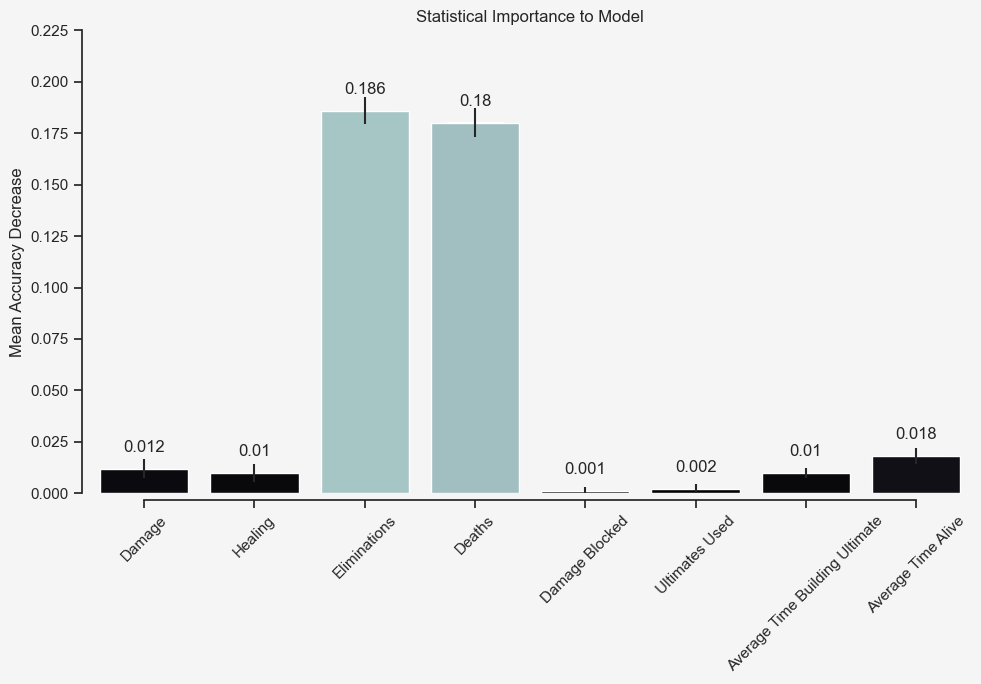

In [60]:
# Finally, we will visualize the most important factors of the data set in regards to helping the model predict the winner
from sklearn.inspection import permutation_importance
sns.set(style="ticks",
        rc={"figure.figsize": (6, 9),
            "figure.facecolor": "whitesmoke",
            "axes.facecolor": "whitesmoke"})

cmap_model = cm.ScalarMappable(col.Normalize(0, 0.25), 'bone')
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=101, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots(figsize = (10, 7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Statistical Importance to Model")
ax.set_ylabel("Mean Accuracy Decrease")
bars = ax.bar(X.columns, round(forest_importances, 3), color = cmap_model.to_rgba(round(forest_importances, 3)))
ax.bar_label(bars, padding = 10)
plt.ylim(0, 0.225)
sns.despine(offset = 5, trim = True)
ax.tick_params(axis = 'x', labelrotation=45)
fig.tight_layout()
plt.show()

Using the provided stats, we achieve a fairly accurate model, correctly predicting who will win the map around 80% of the time. The precision, recall, and accuracy values are very similar, meaning that the model is balanced and can be used in whichever way can be seen fit, either predicting the winner or loser based on the stats. Furthermore, we will add the oWE+ statistic to the model’s training data and observe how it affects the model.

In [61]:
# First, we will split the data into a training and testing set, including the oWE+ column this time
from sklearn.model_selection import train_test_split

modelstats_oWE = stats2022.drop(['Match ID', 'Map', 'Player', 'Team', 'Winner', 'Role', 'oWE'], axis = 1)
X_oWE = modelstats_oWE
y_oWE = stats2022['Winner']

# "Hold-out" method first
X_train_oWE, X_test_oWE, y_train_oWE, y_test_oWE = train_test_split(X_oWE, y_oWE, test_size=0.20, random_state = 101)

rfc.fit(X_train_oWE, y_train_oWE)
rfc_pred_oWE = rfc.predict(X_test_oWE)

print(confusion_matrix(y_test_oWE,rfc_pred_oWE))
print(classification_report(y_test_oWE,rfc_pred_oWE))

[[ 975  280]
 [ 266 1039]]
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78      1255
         1.0       0.79      0.80      0.79      1305

    accuracy                           0.79      2560
   macro avg       0.79      0.79      0.79      2560
weighted avg       0.79      0.79      0.79      2560



In [62]:
# "k-fold cross-validation" to verify results
cv_scores_oWE = cross_val_score(rfc, X_oWE, y_oWE, cv=5)
print(cv_scores_oWE)
print(f'cv_scores mean: {np.mean(cv_scores_oWE)}')
print(f'cv_scores std: {np.std(cv_scores_oWE)}')

[0.79414063 0.790625   0.78242188 0.81281751 0.8042204 ]
cv_scores mean: 0.7968450810863619
cv_scores std: 0.010616459466237925


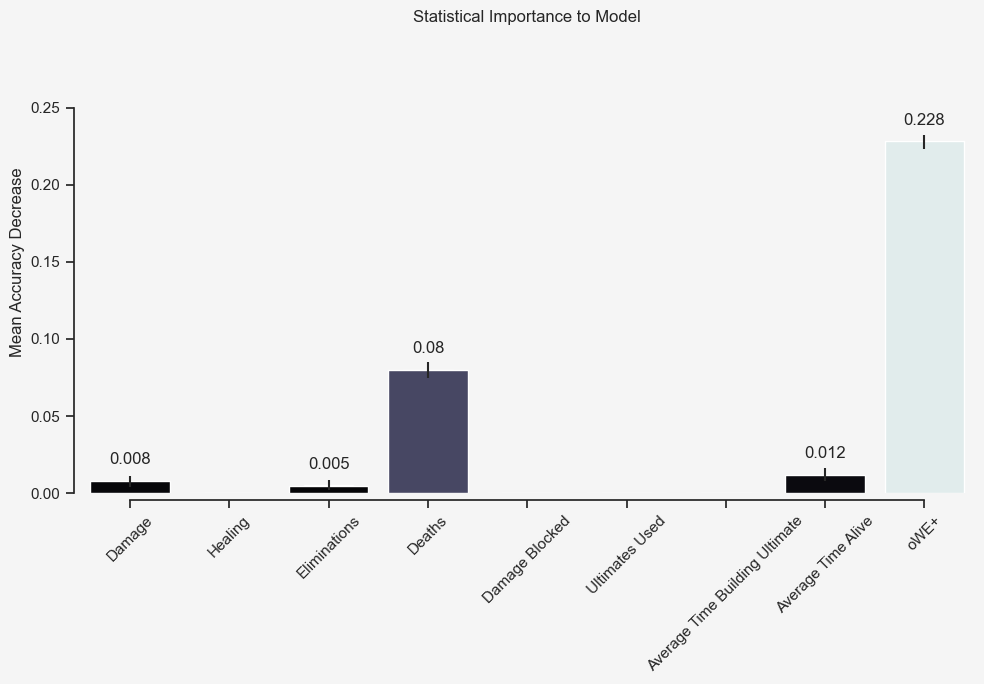

In [64]:
# Finally, we will visualize the most important factors of the data set in regards to helping the model predict the winner
cmap_model_oWE = cm.ScalarMappable(col.Normalize(0, 0.30), 'bone')
result_oWE = permutation_importance(rfc, X_test_oWE, y_test_oWE, n_repeats=10, random_state=101, n_jobs=2)
forest_importances_oWE = pd.Series(result_oWE.importances_mean, index=X_oWE.columns)

fig, ax = plt.subplots(figsize = (10, 7))
forest_importances_oWE.plot.bar(yerr=result_oWE.importances_std, ax=ax)
ax.set_title("Statistical Importance to Model")
ax.set_ylabel("Mean Accuracy Decrease")
bars_oWE = ax.bar(X_oWE.columns, round(forest_importances_oWE, 3), color = cmap_model.to_rgba(round(forest_importances_oWE, 3)))
ax.bar_label(bars_oWE, padding = 10)
plt.ylim(0, 0.3)
sns.despine(offset = 5, trim = True)
ax.tick_params(axis = 'x', labelrotation=45)
fig.tight_layout()
plt.show()

When including oWE+, we produce  a model almost identical to when it was not included in terms of accuracy, precision, and recall. This makes sense as oWE+ is simply a weighted aggregate of all the other statistics that the model previously utilized. The similar model score and lack of feature importances for some statistics help validate that the factors taken into account within the calculation of oWE+ are a good representation of the stats needed to win. Therefore, players with higher oWE+ scores will be better contributors to their teams success compared to players with lower oWE+ scores.

### Conclusion

Overwatch is a complicated esport with intense teamfights and tactical positioning, making it difficult to decipher the most important elements that  lead a team to victory. From what can be gathered from the model, map statistics can predict a team's victory celebration around 80% of the time. From the model and our investigation of the data, it can be determined that Overwatch is, in fact, built upon these teamfights, as the life of all five members of a team is the most important determinants of success, almost equally so if you look at it from the perspective of a teammate losing their life (deaths), or taking one of the opponents (eliminations). Streamers and other professionals throw around the concept of "playing one's life" a lot at the highest levels of play, and there seems to be great evidence in favor of continuing to do so.  
The algorithm of the oWE statistic allows us to find other trends that may go unnoticed on a team-level. Dps is the only role where eliminations are more important than deaths, but only by a slim margin. Meanwhile for supports, and especially tanks, deaths can be devastating to their respective teams when either role falls during a teamfight. The biggest revelation, however, may be for the supports, where the data is decisive in the fact that damage and eliminations are just as important to a great support as are their ability to heal and keep their teammates alive. Finally, from looking at the average oWE+ graphs, it seems that tank is by far the most difficult role to play to provide maximum value to one's team at the highest level, with supports and dps being very similar.  
At the end of the day, map winners in Overwatch are determined by the winners of teamfights. This is reflected in the high importance in eliminations, deaths, and average time spent alive. By trying to predict a map winner, one can find various nuances that help each team gain an advantage in the world of Overwatch. Thus, with a model with around 80% accuracy, we conclude that statistics in Overwatch, particularly eliminations, deaths, average time alive, and my statistic, oWE+, can serve as good indicators of predicting map winners within Overwatch 2.